In [1]:
!python -m spacy download en



    100% |████████████████████████████████| 52.2MB 83.4MB/s ta 0:00:011 4.2MB 113.4MB/s eta 0:00:01

    Linking successful

    /srv/app/venv/lib/python3.6/site-packages/en_core_web_sm/en_core_web_sm-1.2.0
    --> /srv/app/venv/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en').



# [SpaCy](https://spacy.io/): Industrial-Strength NLP

The tradtional NLP library has always been [NLTK](http://www.nltk.org/). While `NLTK` is still very useful for linguistics analysis and exporation, `spacy` has become a nice option for easy and fast implementation of the NLP pipeline. What's the NLP pipeline? It's a number of common steps computational linguists perform to help them (and the computer) better understand textual data. Digital Humanists are often fond of the pipeline because it gives us more things to count! Let's what `spacy` can give us that we can count.

In [2]:
from datascience import *
import spacy

Let's start out with a short string from our reading and see what happens.

In [6]:
my_string = '''
"What are you going to do with yourself this evening, Alfred?" said Mr.
Royal to his companion, as they issued from his counting-house in New
Orleans. "Perhaps I ought to apologize for not calling you Mr. King,
considering the shortness of our acquaintance; but your father and I
were like brothers in our youth, and you resemble him so much, I can
hardly realize that you are not he himself, and I still a young man.
It used to be a joke with us that we must be cousins, since he was a
King and I was of the Royal family. So excuse me if I say to you, as
I used to say to him. What are you going to do with yourself, Cousin
Alfred?"

"I thank you for the friendly familiarity," rejoined the young man.
"It is pleasant to know that I remind you so strongly of my good
father. My most earnest wish is to resemble him in character as much
as I am said to resemble him in person. I have formed no plans for the
evening. I was just about to ask you what there was best worth seeing
or hearing in the Crescent City."'''.replace("\n", " ")

We've downloaded the English model, and now we just have to load it. This model will do ***everything*** for us, but we'll only get a little taste today.

In [3]:
#nlp = spacy.load('en')
nlp = spacy.load('en', parser=False)  # run this instead if you don't have > 1GB RAM

To parse an entire text we just call the model on a string.

In [15]:
parsed_text = nlp(my_string)
parsed_text

 "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or hearing in the Cre

That was quick! So what happened? We've talked a lot about tokenizing, either in words or sentences.

What about sentences?

In [9]:
sents_tab = Table()
sents_tab.append_column(label="Sentence", values=[sentence.text for sentence in parsed_text.sents])
sents_tab.show()

ValueError: Sentence boundary detection requires the dependency parse, which requires data to be installed. For more info, see the documentation: 
https://spacy.io/docs/usage


Words?

In [16]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
toks_tab.show()

Word
""
""""
What
are
you
going
to
do
with
yourself


What about parts of speech?

In [17]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab.show()

Word,POS
,SPACE
"""",PUNCT
What,NOUN
are,VERB
you,PRON
going,VERB
to,PART
do,VERB
with,ADP
yourself,PRON


Lemmata?

In [18]:
toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
toks_tab.show()

Word,POS,Lemma
,SPACE,
"""",PUNCT,""""
What,NOUN,what
are,VERB,be
you,PRON,-PRON-
going,VERB,go
to,PART,to
do,VERB,do
with,ADP,with
yourself,PRON,-PRON-


What else? Let's just make a function `tablefy` that will make a table of all this information for us:

In [21]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [20]:
tablefy(parsed_text).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
,SPACE,,False,False,True,False,False,
"""",PUNCT,"""",False,True,False,False,False,
What,NOUN,what,True,False,False,False,False,
are,VERB,be,True,False,False,False,False,
you,PRON,-PRON-,True,False,False,False,False,
going,VERB,go,False,False,False,False,False,
to,PART,to,True,False,False,False,False,
do,VERB,do,True,False,False,False,False,
with,ADP,with,True,False,False,False,False,
yourself,PRON,-PRON-,True,False,False,False,False,


## Challenge

What's the most common verb? Noun? What if you only include lemmata? What if you remove "stop words"?

How would lemmatizing or removing "stop words" help us better understand a text over regular tokenizing?

In [21]:
most_common_verb = tablefy(parsed_text).where('POS', are.equal_to('VERB')).group('Word').sort('count', descending = True).column(0).item(0)
most_common_verb

'was'

In [22]:
most_common_noun = tablefy(parsed_text).where('POS', are.equal_to('NOUN')).group('Word').sort('count', descending = True).column(0).item(0)
most_common_noun #there are multiple most common nouns 

'man'

In [23]:
most_common_lemmata_verb = tablefy(parsed_text).where('POS', are.equal_to('VERB')).group('Lemma').sort('count', descending = True).column(0).item(0)
most_common_lemmata_verb

'be'

In [40]:
most_common_lemmata_noun = tablefy(parsed_text).where('POS', are.equal_to('NOUN')).group('Lemma').sort('count', descending = True).column(0).item(0)
most_common_lemmata_noun

'what'

In [24]:
most_common_non_stop_word_verb = tablefy(parsed_text).where('POS', are.equal_to('VERB')).where('Stop Word', are.equal_to(False)).group('Word').sort('count', descending = True).column(0).item(0)
most_common_non_stop_word_verb

'resemble'

In [25]:
most_common_non_stop_word_noun = tablefy(parsed_text).where('POS', are.equal_to('NOUN')).where('Stop Word', are.equal_to(False)).group('Word').sort('count', descending = True).column(0).item(0)
most_common_non_stop_word_noun #Again, multiple other common non-stop words 

'man'

---

## Dependency Parsing

Let's look at our text again:

In [20]:
parsed_text

NameError: name 'parsed_text' is not defined

Dependency parsing is one of the most useful and interesting NLP tools. A dependency parser will draw a tree of relationships between words. This is how you can find out specifically what adjectives are attributed to a specific person, what verbs are associated with a specific subject, etc.

`spacy` provides an online visualizer named "displaCy" to visualize dependencies. Let's look at the [first sentence](https://demos.explosion.ai/displacy/?text=%22What%20are%20you%20going%20to%20do%20with%20yourself%20this%20evening%2C%20Alfred%3F%22%20said%20Mr.%20Royal%20to%20his%20companion%2C%20as%20they%20issued%20from%20his%20counting-house%20in%20New%20Orleans.&model=en&cpu=1&cph=1)

![alt text](img/dep_parse.png)

We can loop through a dependency for a subject by checking the `head` attribute for the `pos` tag:

In [19]:
from spacy.symbols import nsubj, VERB

SV = []
for possible_subject in parsed_text:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        SV.append((possible_subject.text, possible_subject.head))

NameError: name 'parsed_text' is not defined

In [51]:
sv_tab = Table()
sv_tab.append_column(label="Subject", values=[x[0] for x in SV])
sv_tab.append_column(label="Verb", values=[x[1] for x in SV])
sv_tab.show()

Subject,Verb
you,going
they,issued
I,ought
I,were
you,resemble
I,realize
you,are
It,used
we,be
he,was


You can imagine that you could look over a large corpus to analyze first person, second person, and third person characterizations. Dependency parsers are also important for understanding and processing natural language, a question answering system for example. These models help the computer understand *what* the question is that is being asked.

## Limitations

How accurate are the models? What happens if we change the style of English we're working with?

In [28]:
shakespeare = '''
Tush! Never tell me; I take it much unkindly
That thou, Iago, who hast had my purse
As if the strings were thine, shouldst know of this.
'''

shake_parsed = nlp(shakespeare.strip())
tablefy(shake_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
Tush,NOUN,tush,False,False,False,False,False,
!,PUNCT,!,False,True,False,False,False,
Never,ADV,never,True,False,False,False,False,
tell,VERB,tell,False,False,False,False,False,
me,PRON,-PRON-,True,False,False,False,False,
;,PUNCT,;,False,True,False,False,False,
I,PRON,-PRON-,True,False,False,False,False,
take,VERB,take,True,False,False,False,False,
it,PRON,-PRON-,True,False,False,False,False,
much,ADV,much,True,False,False,False,False,


In [29]:
huck_finn_jim = '''
“Who dah?” “Say, who is you?  Whar is you?  Dog my cats ef I didn’ hear sumf’n.
Well, I know what I’s gwyne to do:  I’s gwyne to set down here and listen tell I hears it agin.”"
'''

hf_parsed = nlp(huck_finn_jim.strip())
tablefy(hf_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
“,PUNCT,"""",False,True,False,False,False,
Who,NOUN,who,True,False,False,False,False,
dah,NOUN,dah,False,False,False,False,True,
?,PUNCT,?,False,True,False,False,False,
”,PUNCT,"""",False,True,False,False,False,
“,PUNCT,"""",False,True,False,False,False,
Say,PROPN,say,True,False,False,False,False,
",",PUNCT,",",False,True,False,False,False,
who,NOUN,who,True,False,False,False,False,
is,VERB,be,True,False,False,False,False,


In [30]:
text_speech = '''
LOL where r u rn? omg that's sooo funnnnnny. c u in a sec.
'''
ts_parsed = nlp(text_speech.strip())
tablefy(ts_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
LOL,PROPN,lol,False,False,False,False,False,
where,ADV,where,True,False,False,False,False,
r,NOUN,r,False,False,False,False,False,
u,X,u,False,False,False,False,False,
rn,NOUN,rn,False,False,False,False,False,
?,PUNCT,?,False,True,False,False,False,
omg,NOUN,omg,False,False,False,False,True,
that,ADJ,that,True,False,False,False,False,
's,VERB,be,False,False,False,False,False,
sooo,ADJ,sooo,False,False,False,False,False,


In [31]:
old_english = '''
þæt wearð underne      eorðbuendum, 
þæt meotod hæfde      miht and strengðo 
ða he gefestnade      foldan sceatas. 
'''
oe_parsed = nlp(old_english.strip())
tablefy(oe_parsed).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
þæt,NOUN,þæt,False,False,False,False,True,
wearð,NOUN,wearð,False,False,False,False,True,
underne,ADJ,underne,False,False,False,False,True,
,SPACE,,False,False,True,False,False,
eorðbuendum,NOUN,eorðbuendum,False,False,False,False,True,
",",PUNCT,",",False,True,False,False,False,
,SPACE,,False,False,True,False,False,
þæt,NOUN,þæt,False,False,False,False,True,
meotod,NOUN,meotod,False,False,False,False,True,
hæfde,NOUN,hæfde,False,False,False,False,True,


## NER and Civil War-Era Novels

Wilkens uses a technique called "NER", or "Named Entity Recognition" to let the computer identify all of the geographic place names. Wilkens writes:

> Text strings representing named locations in the corpus were identified using
the named entity recognizer of the Stanford CoreNLP package with supplied training
data. To reduce errors and to narrow the results for human review, only those
named-location strings that occurred at least five times in the corpus and were used
by at least two different authors were accepted. The remaining unique strings were
reviewed by hand against their context in each source volume. [883]

While we don't have the time for a human review right now, `spacy` does allow us to annotate place names (among other things!) in the same fashion as Stanford CoreNLP (a native Java library):

In [32]:
ner_tab = Table()
ner_tab.append_column(label="NER Label", values=[ent.label_ for ent in parsed_text.ents])
ner_tab.append_column(label="NER Text", values=[ent.text for ent in parsed_text.ents])
ner_tab.show()

NER Label,NER Text
TIME,this evening
PERSON,Alfred
PERSON,Royal
GPE,New Orleans
PERSON,King
ORG,Royal
PERSON,Alfred
GPE,Crescent City


Cool! It's identified a few types of things for us. We can check what these mean [here](https://spacy.io/docs/usage/entity-recognition#entity-types). `GPE` is country, cities, or states. Seems like that's what Wilkens was using.

Since we don't have his corpus of 1000 novels, let's just take our reading, *A Romance of the Republic*, as an example. We can use the `requests` library to get the raw `HTML` of a web page, and if we take the `.text` property we can make this a nice string.

In [33]:
import requests

text = requests.get("http://www.gutenberg.org/files/10549/10549.txt").text
text = text[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
print(text[:5000])

ModuleNotFoundError: No module named 'requests.packages.idna.uts46data'

We'll leave the chapter headers for now, it shouldn't affect much. Now we need to parse this with that `nlp` function:

In [34]:
parsed = nlp(text)

NameError: name 'text' is not defined

## Challenge

With this larger string, find the most common noun, verb, and adjective. Then explore the other features of `spacy` and see what you can discover about our reading:

---

Let's continue in the fashion that Wilkens did and extract the named entities, specifically those for "GPE". We can loop through each entity, and if it is labeled as `GPE` we'll add it to our `places` list. We'll then make a `Counter` object out of that to get the frequency of each place name.

In [35]:
from collections import Counter

places = []

for ent in parsed.ents:
    if ent.label_ == "GPE":
        places.append(ent.text.strip())

places = Counter(places)
places.most_common()

NameError: name 'parsed' is not defined

That looks OK, but it's pretty rough! Keep this in mind when using trained models. They aren't 100% accurate. That's why Wilkens went through by hand after to get rid of the garbage.

If you thought NER was cool, wait for this. Now that we have a list of "places", we can send that to an online database to get back latitude and longitude coordinates (much like Wilkens used Google's geocoder), along with the US state. To make sure it's actually a US state, we'll need a list to compare to. So let's load that:

In [61]:
with open('data/us_states.txt', 'r') as f:
    states = f.read().split('\n')
    states = [x.strip() for x in states]

states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

OK, now we're ready. The `Nominatim` function from the `geopy` library will return an object that has the properties we want. We'll append a new row to our table for each entry. Importantly, we're using the `keys` of the `places` counter because we don't need to ask the database for "New Orleans" 10 times to get the location. So after we get the information we'll just add as many rows as the counter tells us there are.

In [62]:
from geopy.geocoders import Nominatim
from datascience import *
import time

geolocator = Nominatim(timeout=10)

geo_tab = Table(["latitude", "longitude", "name", "state"])

for name in places.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(places[name] - 1):
            geo_tab.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for New Orleans...
Getting information for Crescent City...
Getting information for Boston...
Getting information for France...
Getting information for Papasito...
Getting information for Floracita...
Getting information for Taglioni...
Getting information for Italy...
Getting information for Mozart...
Getting information for Buona Notte...
Getting information for West Indies...
Getting information for Tulipa...
Getting information for Oriental...
Getting information for St. Augustine...
Getting information for Paris...
Getting information for Eulalia...
Getting information for Louisiana...
Getting information for Canova...
Getting information for La Bayadere...
Getting information for Venice...
Getting information for Battledoor...
Getting information for Cher...
Getting information for _...
Getting information for Buenas...
Getting information for Rosabella...
Getting information for Youth...
Getting information for New York...
Getting information for Mamita...
Ge

In [63]:
geo_tab.show()

latitude,longitude,name,state
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana
29.9499,-90.0701,New Orleans,Louisiana


Now we can plot a nice [choropleth](https://en.wikipedia.org/wiki/Choropleth_map).

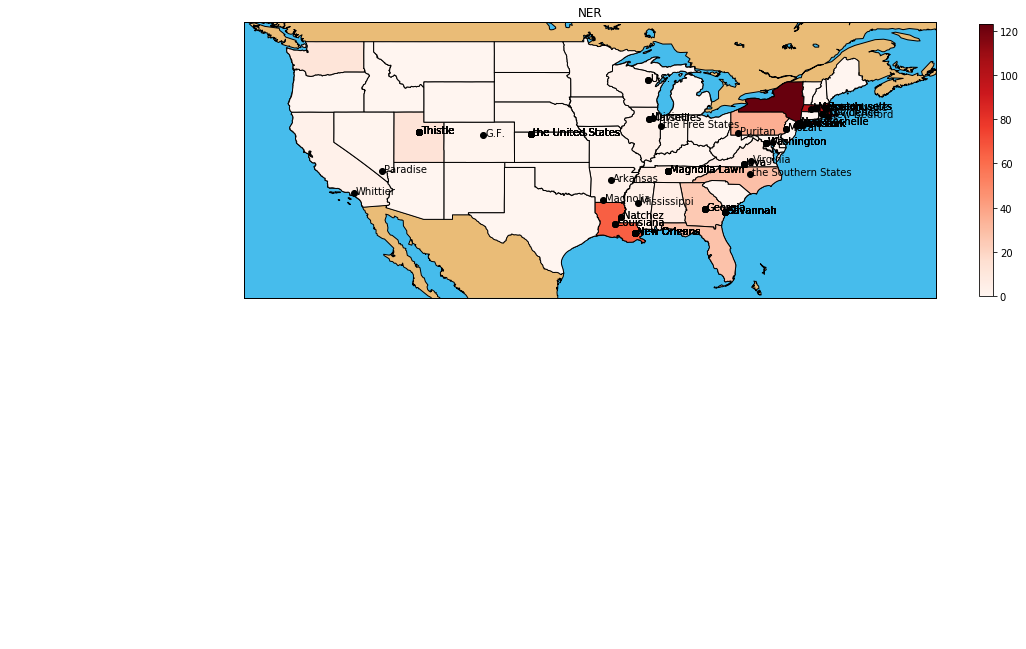

In [64]:
%matplotlib inline

from scripts.choropleth import us_choropleth
us_choropleth(geo_tab)

---

# Homework:

Find the text to three different Civil War-Era (1851-1875) novels on [Project Gutenberg](https://www.gutenberg.org/) (maybe mentioned in our reading?!). Make sure you click for the `.txt` files, and use a `GET` request from the `requests` library to get the text. 

First do some exploration on parts of speech. Then combine the NER location frequencies and plot a choropleth. Look closely at the words plotted. How did the NER model do? How does your choropleth look compared to Wilkens'?

In [11]:
import requests

rose_of_the_world = requests.get('http://www.gutenberg.org/files/55696/55696-0.txt').text
the_post_office = requests.get('http://www.gutenberg.org/files/55685/55685-0.txt').text
firebrands = requests.get('http://www.gutenberg.org/cache/epub/55684/pg55684.txt').text
project_text = nlp(rose_of_the_world + " " + the_post_office + " " + firebrands)

In [12]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word.text for word in project_text])
toks_tab.append_column(label="POS", values=[word.pos_ for word in project_text])
toks_tab.show(10)

Word,POS
﻿,NOUN
,SPACE
ROSE,VERB
OF,ADP
THE,DET
WORLD,PROPN
,SPACE
This,DET
ebook,NOUN
is,VERB


In [13]:
from collections import Counter

places = []

for ent in project_text.ents:
    if ent.label_ == "GPE":
        places.append(ent.text.strip())

places = Counter(places)
places.most_common()

[('', 250),
 ('London', 185),
 ('England', 71),
 ('India', 58),
 ('the United States', 47),
 ('Aspasia', 29),
 ('Great Britain', 22),
 ('U.S.', 21),
 ('Liverpool', 21),
 ('Scotland', 20),
 ('America', 20),
 ('Paris', 17),
 ('Ireland', 15),
 ('Birmingham', 14),
 ('Glasgow', 14),
 ('France', 14),
 ('the', 12),
 ('Kingdom', 12),
 ('Edinburgh', 12),
 ('Manchester', 11),
 ('the United Kingdom', 11),
 ('New Zealand', 11),
 ('Aberdeen', 10),
 ('Bristol', 9),
 ('Pathan', 8),
 ('New York', 8),
 ('Germany', 8),
 ('Australia', 8),
 ('United States', 8),
 ('China', 8),
 ('Japan', 8),
 ('E.C.', 7),
 ('Brighton', 7),
 ('Shetland', 7),
 ('Belgium', 7),
 ('Santa Claus', 7),
 ('Switzerland', 7),
 ('United\r\nStates', 6),
 ('Fairbanks', 6),
 ("St. Martin's", 6),
 ('the Kingdom', 6),
 ('C.B.', 6),
 ('Euston', 6),
 ('South Africa', 6),
 ('Canada', 6),
 ('Persia', 6),
 ('Dublin', 6),
 ('Cape', 6),
 ('Houston', 6),
 ('Rosamond’s', 5),
 ('the City of London', 5),
 ('Egypt', 5),
 ('Spain', 5),
 ('Wheatstone',

In [18]:
with open('data/us_states.txt', 'r') as f:
    states = f.read().split('\n')
    states = [x.strip() for x in states]

states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [19]:
from geopy.geocoders import Nominatim
from datascience import *
import time

geolocator = Nominatim(timeout=10)

geo_tab = Table(["latitude", "longitude", "name", "state"])

for name in places.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(places[name] - 1):
            geo_tab.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for the United States...
Getting information for United
States...
Getting information for WATERLOO...
Getting information for India...
Getting information for England...
Getting information for ...
Getting information for Dorset...
Getting information for Aspasia...
Getting information for Thoroughly...
Getting information for London...
Getting information for These...
Getting information for his...
Getting information for Thoreau...
Getting information for Aspasia’s...
Getting information for Ladyship’s...
Getting information for Reason...
Getting information for Panama...
Getting information for Dorsetshire...
Getting information for Saltwoods...
Getting information for Baroghil...
Getting information for the...
Getting information for Pathan...
Getting information for Rosamond’s...
Getting information for "Lady...
Getting information for Vienna...
Getting information for ’s England...
Getting information for The "Boy’s...
Getting information for Major...
Getting 

Getting information for Epsom...
Getting information for Leatherhead...
Getting information for Kingston...
Getting information for Redhill...
Getting information for Eastbourne...
Getting information for Southampton...
Getting information for Reading...
Getting information for Portsmouth...
Getting information for Warwick...
Getting information for Worcester...
Getting information for Kent...
Getting information for Chesham...
Getting information for Taplow...
Getting information for Boulogne...
Getting information for Dublin...
Getting information for Australia...
Getting information for United States...
Getting information for Madrid...
Getting information for Spain...
Getting information for Italy...
Getting information for Yorkshire...
Getting information for Aberystwith...
Getting information for Aldershot...
Getting information for Young Lady...
Getting information for Thurso...
Getting information for Kirkwall...
Getting information for Hannibal...
Getting information for Santa

Getting information for Brontë...
Getting information for Charlotte...
Getting information for Burdett...
Getting information for Burravoe...
Getting information for M.P....
Getting information for Dockwra...
Getting information for Dryden...
Getting information for Telegraphs...
Getting information for Freeling...
Getting information for Gavey...
Getting information for Henniker...
Getting information for Hill...
Getting information for Kekewich...
Getting information for Knoydart...
Getting information for Lichfield...
Getting information for North-Western Railway...
Getting information for Lusitania...
Getting information for Manila...
Getting information for Middleton...
Getting information for O'Connor...
Getting information for Mowatt...
Getting information for Mulock...
Getting information for Florence...
Getting information for Telephone...
Getting information for Addresses...
Getting information for Empire...
Getting information for Usefulness...
Getting information for Preece

In [20]:
geo_tab.show(10)

latitude,longitude,name,state
35.4024,-108.223,Thoreau,New Mexico
35.1332,33.3662,Aspasia’s,New Mexico
35.1332,33.3662,Aspasia’s,New Mexico
8.30961,-81.3066,Panama,New Mexico
50.8273,-2.36509,Dorsetshire,New Mexico
30.2799,76.7158,Pathan,New Mexico
30.2799,76.7158,Pathan,New Mexico
30.2799,76.7158,Pathan,New Mexico
30.2799,76.7158,Pathan,New Mexico
30.2799,76.7158,Pathan,New Mexico


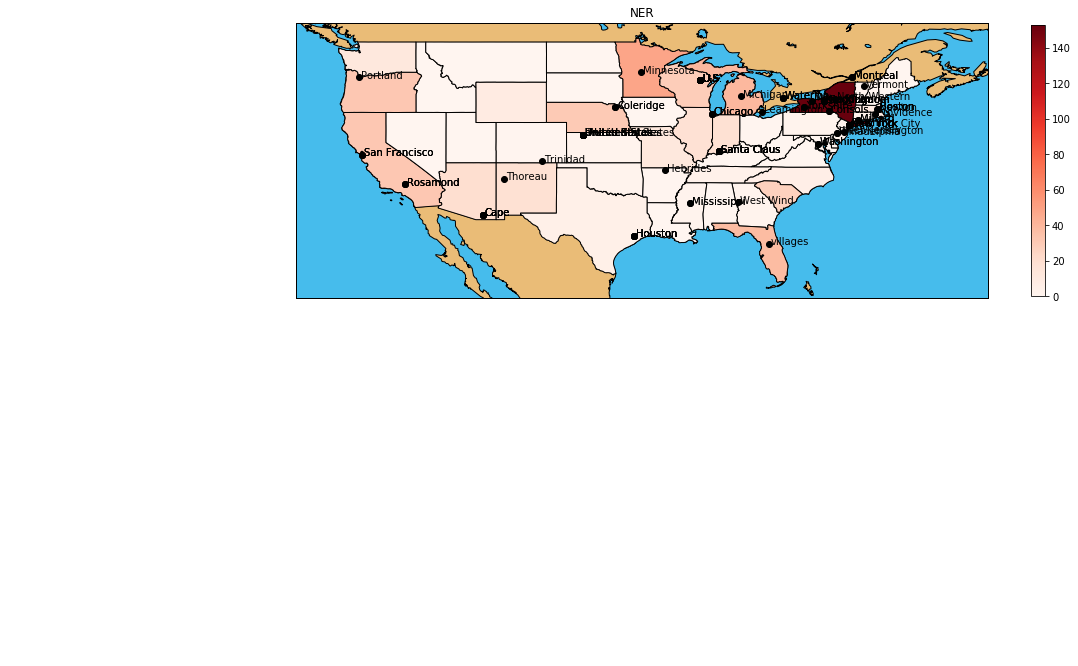

In [21]:
%matplotlib inline

from scripts.choropleth import us_choropleth
us_choropleth(geo_tab)